In [47]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
walmat_df = pd.read_csv('Walmart_Store_sales.csv')
walmat_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
walmat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Now we can check the uniqueness of categorical values and distribution of continuous values.

In [4]:
walmat_df['Store'].nunique()

45

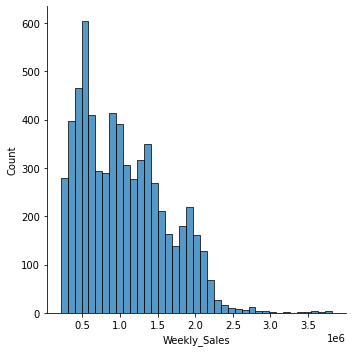

In [5]:
sns.displot(walmat_df['Weekly_Sales'])
plt.show()

It seems reasonable.

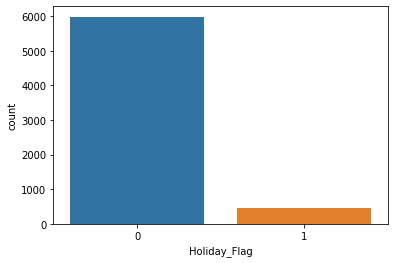

In [6]:
sns.countplot(walmat_df['Holiday_Flag'])
plt.show()

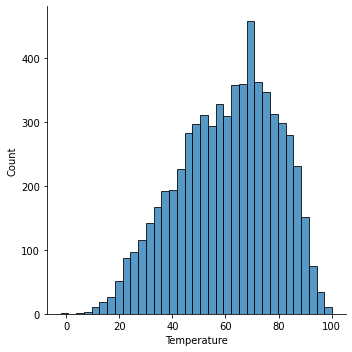

In [7]:
sns.displot(walmat_df['Temperature'])
plt.show()

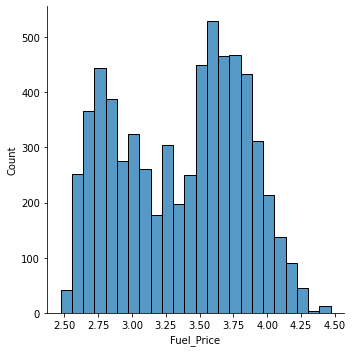

In [8]:
sns.displot(walmat_df['Fuel_Price'])
plt.show()

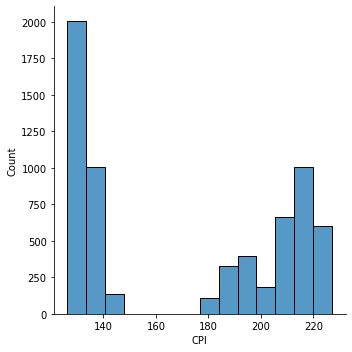

In [9]:
sns.displot(walmat_df['CPI'])
plt.show()

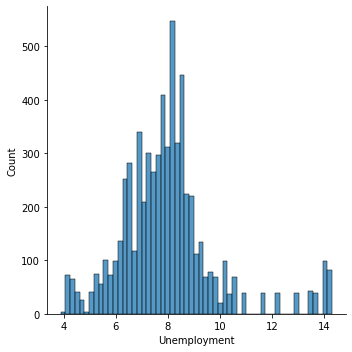

In [10]:
sns.displot(walmat_df['Unemployment'])
plt.show()

Everything seems fine from the plots.

In [11]:
# Store with maximum sale

store_sales = walmat_df.groupby('Store')['Weekly_Sales'].sum().sort_values()

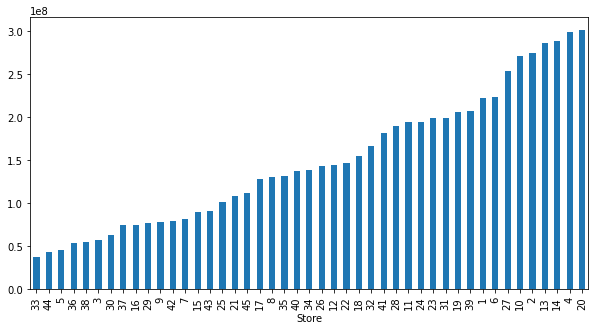

In [12]:
store_sales.plot(kind='bar', figsize=(10,5))
plt.show()

In [13]:
print('Store {} has highest sales.'.format(store_sales.index[np.argmax(store_sales.values)]))

Store 20 has highest sales.


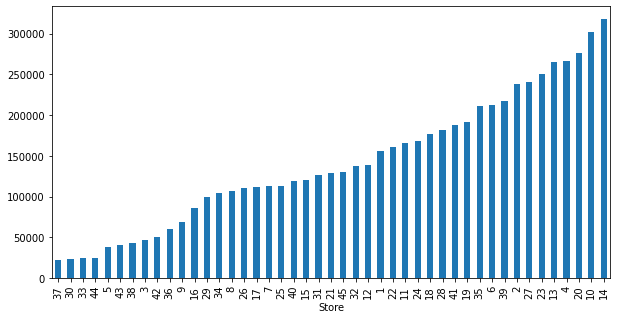

In [14]:
# Store with maximum std-dev
store_sales_std = walmat_df.groupby('Store')['Weekly_Sales'].std().sort_values()

store_sales_std.plot(kind='bar', figsize=(10,5))
plt.show()

In [15]:
print('Store with highest std of sales: {}'.format(store_sales_std.index[np.argmax(store_sales_std.values)]))

Store with highest std of sales: 14


In [16]:
# coefficient of std-dev
coeff_std = pd.DataFrame(walmat_df.groupby('Store')['Weekly_Sales'].std() / walmat_df.groupby('Store')['Weekly_Sales'].mean())
coeff_std.rename(columns={'Weekly_Sales': 'Coeff Std-dev'}, inplace=True)
coeff_std.sort_values('Coeff Std-dev', ascending=False, inplace=True)

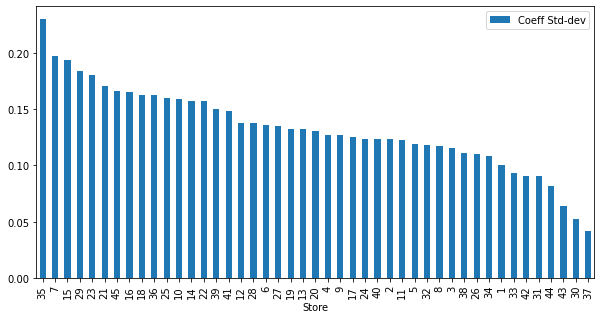

In [17]:
coeff_std.plot(kind='bar', figsize=(10,5))
plt.show()

Store 35 has highest coefficient of std-dev.

We need the store that has highest quaterly growth in 3rd quester. So can check the difference between the total sales in Q2 and Q3. if difference is +ve, then there is growth in 3rd Q.

In [51]:
sales_2Q = walmat_df[['Store', 'Weekly_Sales']][(walmat_df['Month'] >=4) & (walmat_df['Month'] <=6)].groupby('Store').sum()
sales_3Q = walmat_df[['Store', 'Weekly_Sales']][(walmat_df['Month'] >=7) & (walmat_df['Month'] <=9)].groupby('Store').sum()

In [57]:
sales_2Q.rename(columns={'Weekly_Sales': '2ndQ_Sales'}, inplace=True)
sales_3Q.rename(columns={'Weekly_Sales': '3rdQ_Sales'}, inplace=True)

In [58]:
sales_2Q_3Q = pd.concat([sales_2Q, sales_3Q], axis=1)
sales_2Q_3Q.head()

,2ndQ_Sales,3rdQ_Sales
Store,,
1,60428109.28,60156360.07
2,74356863.71,73449989.13
3,15459189.58,15218138.65
4,79302988.73,81194592.89
5,12523263.09,12166295.19


In [59]:
sales_2Q_3Q['Diff'] = sales_2Q_3Q['3rdQ_Sales'] - sales_2Q_3Q['2ndQ_Sales']
sales_2Q_3Q.head()

,2ndQ_Sales,3rdQ_Sales,Diff
Store,,,
1,60428109.28,60156360.07,-271749.21
2,74356863.71,73449989.13,-906874.58
3,15459189.58,15218138.65,-241050.93
4,79302988.73,81194592.89,1891604.16
5,12523263.09,12166295.19,-356967.90


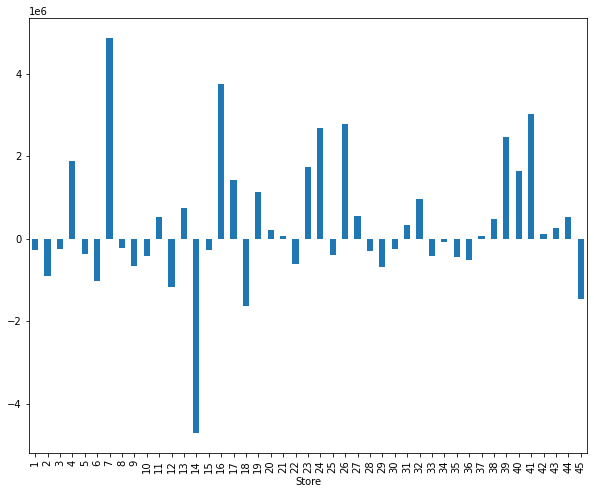

In [60]:
sales_2Q_3Q['Diff'].plot(kind='bar', figsize=(10,8))
plt.show()

Store 7 has seen the highest growth in 3rd Quater, where as store 14 faced a huge fall in sales. But most of the stores have good sale growth in Q3.

In [19]:
walmat_df['Date'] = pd.to_datetime(walmat_df['Date'], format='%d-%m-%Y')
walmat_df['Day'] = walmat_df['Date'].apply(lambda x: x.day)
walmat_df['Month'] = walmat_df['Date'].apply(lambda x: x.month)
walmat_df['Year'] = walmat_df['Date'].apply(lambda x: x.year)

walmat_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [20]:
def getHoliday(x):
    if (x['Day'] in [8,10,11,12] and x['Month'] == 2):
        return 'Super Bowl'
    elif (x['Day'] in [6,7,9,10] and x['Month'] == 9):
        return 'Labour Day'
    elif (x['Day'] in [23,25,26,29] and x['Month'] == 11):
        return 'Thanksgiving'
    elif (x['Day'] in [27,28,30,31] and x['Month'] == 12):
        return 'Christmas'
    else:
        return 'W-day'

In [21]:
holiday_data = walmat_df.copy()
holiday_data['Holiday Name'] = holiday_data.apply(getHoliday, axis=1)
holiday_data.drop(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis=1, inplace=True)
holiday_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Day,Month,Year,Holiday Name
0,1,2010-02-05,1643690.90,0,5,2,2010,W-day
1,1,2010-02-12,1641957.44,1,12,2,2010,Super Bowl
2,1,2010-02-19,1611968.17,0,19,2,2010,W-day
3,1,2010-02-26,1409727.59,0,26,2,2010,W-day
4,1,2010-03-05,1554806.68,0,5,3,2010,W-day


In [22]:
# Get avg sales i each holiday and working days

holiday_means = holiday_data.groupby('Holiday Name')['Weekly_Sales'].mean()
holiday_means

Holiday Name
Christmas       9.608331e+05
Labour Day      1.042427e+06
Super Bowl      1.079128e+06
Thanksgiving    1.471273e+06
W-day           1.041256e+06
Name: Weekly_Sales, dtype: float64

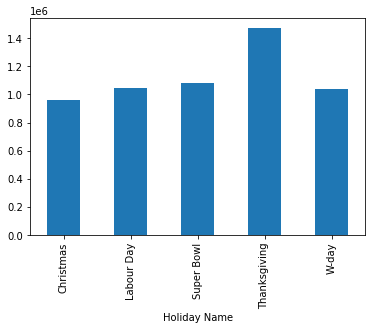

In [23]:
holiday_means.plot.bar()
plt.show()

In [24]:
# Holidays having mean sales more than that of non-holiday

holiday_means[holiday_means > holiday_means['W-day']]

Holiday Name
Labour Day      1.042427e+06
Super Bowl      1.079128e+06
Thanksgiving    1.471273e+06
Name: Weekly_Sales, dtype: float64

Labour Day, Super Bowl and Thanksgiving holidays have more sales than non-holidays.

Now we can plot the monthly trend for total and avg sales.

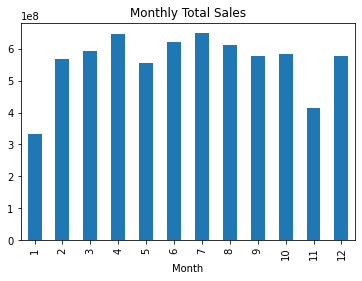

In [25]:
monthly_total = walmat_df.groupby('Month')['Weekly_Sales'].sum()
monthly_total.plot.bar()
plt.title('Monthly Total Sales')
plt.show()

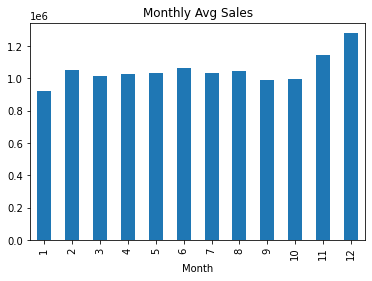

In [26]:
monthly_avg = walmat_df.groupby('Month')['Weekly_Sales'].mean()
monthly_avg.plot.bar()
plt.title('Monthly Avg Sales')
plt.show()

Store 4 and 7 have highest total sales where as store 11 and 12 have highest avg sales. (Monthly)

In [27]:
sem1_data = walmat_df[['Store', 'Weekly_Sales']][(walmat_df['Month'] >=1) & (walmat_df['Month'] <=6)]
sem2_data = walmat_df[['Store', 'Weekly_Sales']][(walmat_df['Month'] >6) & (walmat_df['Month'] <=12)]

In [28]:
sem1_data.rename(columns={'Weekly_Sales': 'Sem1'}, inplace=True)
sem2_data.rename(columns={'Weekly_Sales': 'Sem2'}, inplace=True)
sem_data = pd.merge(sem1_data, sem2_data, on='Store')
sem_data = sem_data.groupby('Store').sum()
sem_data.head()

,Sem1,Sem2
Store,,
1,8.029283e+09,8.029283e+09
2,9.886854e+09,9.886854e+09
3,2.081923e+09,2.081923e+09
4,1.061221e+10,1.061221e+10
5,1.636375e+09,1.636375e+09


In [29]:
sem_data['Diff'] = sem_data['Sem2'] - sem_data['Sem1']
sem_data.head()

,Sem1,Sem2,Diff
Store,,,
1,8.029283e+09,8.029283e+09,0.000064
2,9.886854e+09,9.886854e+09,0.000010
3,2.081923e+09,2.081923e+09,0.000023
4,1.061221e+10,1.061221e+10,0.000288
5,1.636375e+09,1.636375e+09,0.000001


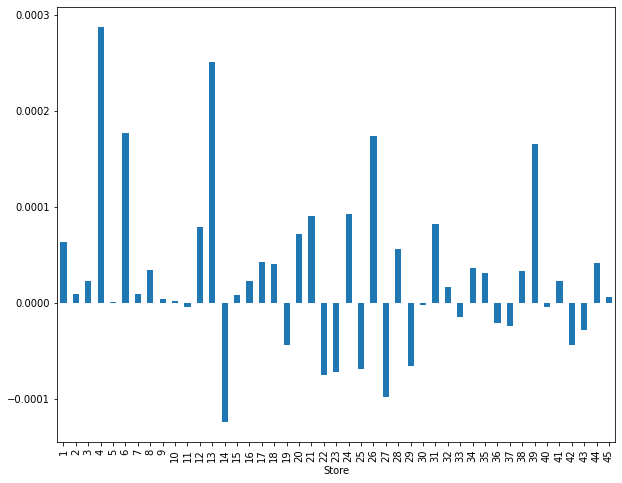

In [30]:
sem_data['Diff'].plot(kind='bar', figsize=(10,8))
plt.show()

Most of the stores have growth in 2nd sem compared to 1st.

Now we need to check the impact of features on sales and check linear relationship.

In [32]:
# Use data for store 1

walmat_store_1 = walmat_df[walmat_df['Store'] == 1]
walmat_store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [33]:
walmat_store_1.sort_values('Date', inplace=True)

In [38]:
oc = OrdinalEncoder()
walmat_store_1['Date_Number'] = oc.fit_transform(walmat_store_1[['Date']])
walmat_store_1['Date_Number'] = walmat_store_1['Date_Number'].astype('int64')
walmat_store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Date_Number
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,0
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,3
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,4


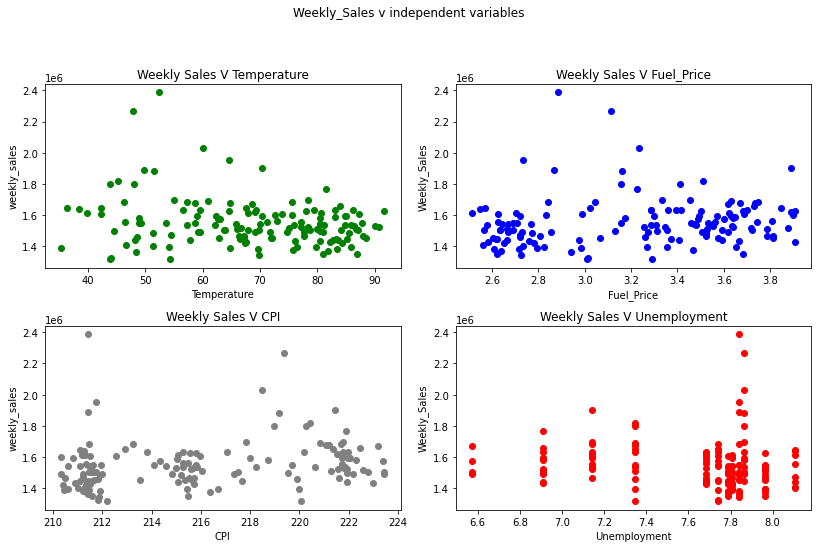

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].scatter(walmat_store_1['Temperature'], walmat_store_1['Weekly_Sales'],color='green')
axs[0, 0].set(title='Weekly Sales V Temperature', xlabel='Temperature', ylabel='weekly_sales')
axs[0, 1].scatter(walmat_store_1['Fuel_Price'], walmat_store_1['Weekly_Sales'],color='blue')
axs[0, 1].set(title='Weekly Sales V Fuel_Price', xlabel='Fuel_Price', ylabel='Weekly_Sales')
axs[1, 0].scatter(walmat_store_1['CPI'], walmat_store_1['Weekly_Sales'],color='grey')
axs[1, 0].set(title='Weekly Sales V CPI', xlabel='CPI', ylabel='weekly_sales')
axs[1, 1].scatter(walmat_store_1['Unemployment'], walmat_store_1['Weekly_Sales'],color='red')
axs[1, 1].set(title='Weekly Sales V Unemployment', xlabel='Unemployment', ylabel='Weekly_Sales')
plt.suptitle('Weekly_Sales v independent variables')
plt.tight_layout(pad=3, w_pad=1.0, h_pad=1.0)
plt.show()

From the plots, we dont see linear relationship with sales. 

We can use correlation among the attributes.

In [41]:
walmat_store_1.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year,Date_Number
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekly_Sales,NaN,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955,-0.271685,0.202188,0.152396,0.214539
Holiday_Flag,NaN,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949,0.044526,0.122996,-0.056783,-0.013285
Temperature,NaN,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695,0.051077,0.246417,0.068843,0.154069
Fuel_Price,NaN,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944,0.030806,-0.101256,0.809769,0.781789
CPI,NaN,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471,0.033588,0.050952,0.948141,0.973943
Unemployment,NaN,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000,-0.018342,0.040821,-0.798149,-0.791222
Day,NaN,-0.271685,0.044526,0.051077,0.030806,0.033588,-0.018342,1.000000,0.015192,0.006406,0.041930
Month,NaN,0.202188,0.122996,0.246417,-0.101256,0.050952,0.040821,0.015192,1.000000,-0.194465,0.145651
Year,NaN,0.152396,-0.056783,0.068843,0.809769,0.948141,-0.798149,0.006406,-0.194465,1.000000,0.941668


There is not much coorelation of attributes with weekly sales.

There are high correlation with temperature, CPI, date.

CPI and unemployeement are -ve correlated.

We can use a pairplot to check further.

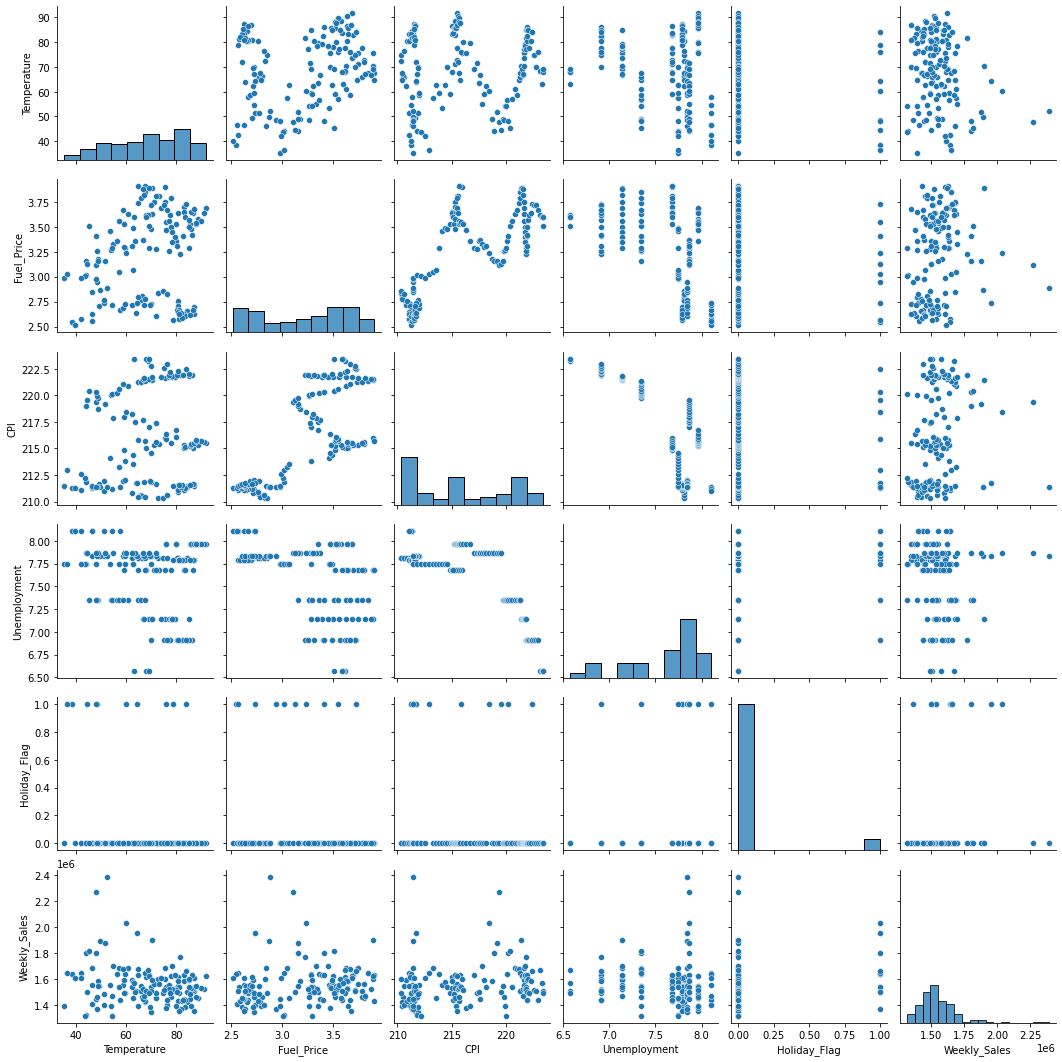

In [43]:
sns.pairplot(walmat_store_1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Holiday_Flag', 'Weekly_Sales']])
plt.show()

We dont get much insight from the plot.

Now we can go for linear regression check after selecting few columns.

In [44]:
walmat_store_1_selected = walmat_store_1[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']]

In [45]:
x = walmat_store_1_selected.drop('Weekly_Sales', axis=1)
y = walmat_store_1_selected['Weekly_Sales']

print(x.shape)
print(y.shape)

(143, 5)
(143,)


In [48]:
# Hypothesis testing OLS (H0: There is no relation between the features and the target)

x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.tvalues)
print(result.summary())

const          -1.385005
Holiday_Flag    1.811488
Temperature    -2.343076
Fuel_Price     -0.514139
CPI             2.450835
Unemployment    1.365813
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     4.815
Date:                Mon, 23 May 2022   Prob (F-statistic):           0.000436
Time:                        14:18:10   Log-Likelihood:                -1900.8
No. Observations:                 143   AIC:                             3814.
Df Residuals:                     137   BIC:                             3831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t

We can see,Holiday_Flag, Fuel_Price, Unemployment has p-value more than 0.05. Fuel price has highest p-value score.

In next model, we can try removing the fuel price and test again.

In [49]:
walmat_store_1_selected = walmat_store_1[['Holiday_Flag', 'Temperature', 'CPI', 'Unemployment', 'Weekly_Sales']]
x = walmat_store_1_selected.drop('Weekly_Sales', axis=1)
y = walmat_store_1_selected['Weekly_Sales']

print(x.shape)
print(y.shape)

(143, 4)
(143,)


In [50]:
# 2nd test

x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
print(result.tvalues)
print(result.summary())

const          -1.339394
Holiday_Flag    1.867002
Temperature    -2.554918
CPI             2.923462
Unemployment    1.272270
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     5.985
Date:                Mon, 23 May 2022   Prob (F-statistic):           0.000180
Time:                        14:22:49   Log-Likelihood:                -1900.9
No. Observations:                 143   AIC:                             3812.
Df Residuals:                     138   BIC:                             3827.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025  

Holiday_Flag and Unemployment has p-value more than 0.05.

So null hypothesis H0 cant be rejected. We can say, there is no relationship between the weekly sale and the selected features with high p-values.